# **Lab 06**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##**Case Study 1: Customer Purchasing Behavior Analysis**

In [ ]:
np.random.seed(0)
customerId=np.arange(1, 1001)
age=np.random.randint(18, 71, 1000)
annualIncome=np.random.randint(20000, 120001, 1000)
gender=np.random.choice(['Male', 'Female'], 1000)
purchased=np.random.randint(0, 2, 1000)

data=pd.DataFrame({'CustomerID':customerId,'Age':age,'Annual Income':annualIncome,'Gender':gender,'Purchased':purchased})

In [ ]:
print(data.head(10))
print(data.isnull().sum())

   CustomerID  Age  Annual Income  Gender  Purchased
0           1   62          59789    Male          1
1           2   65          32912    Male          0
2           3   18          57285    Male          1
3           4   21          49764  Female          1
4           5   21          94165    Male          1
5           6   57          47661    Male          0
6           7   27          75397  Female          1
7           8   37          49459    Male          0
8           9   39          64296  Female          0
9          10   68          27008  Female          0
CustomerID       0
Age              0
Annual Income    0
Gender           0
Purchased        0
dtype: int64


In [ ]:
data['Annual Income']=data['Annual Income'].fillna(data['Annual Income'].median())

In [ ]:
data['Gender']=data['Gender'].map({'Male': 0, 'Female': 1})
#data['Purchased']=data['Purchased'].astype(int)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Age','Annual Income']]=scaler.fit_transform(data[['Age','Annual Income']])

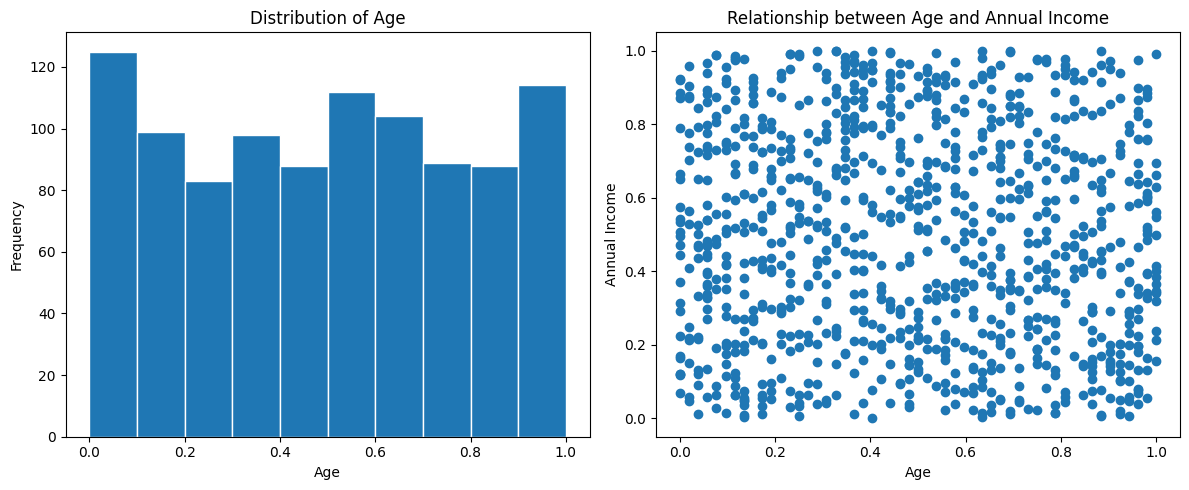

In [ ]:
fig, axes=plt.subplots(1, 2, figsize=(12, 5))

################ Histogram ##################
axes[0].hist(data['Age'], bins=10, edgecolor='white')
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

############## Scatter plot #################
axes[1].scatter(data['Age'], data['Annual Income'])
axes[1].set_title('Relationship between Age and Annual Income')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Annual Income')

plt.tight_layout()
plt.show()

In [ ]:
corr_matrix=data[['Age', 'Annual Income', 'Purchased']].corr()
print(corr_matrix)

                    Age  Annual Income  Purchased
Age            1.000000      -0.058521   0.010809
Annual Income -0.058521       1.000000   0.038540
Purchased      0.010809       0.038540   1.000000


In [ ]:
data['Income per Age']=data['Annual Income']/data['Age']
print(data.head())

   CustomerID       Age  Annual Income  Gender  Purchased  Income per Age
0           1  0.846154       0.397247       0          1        0.469474
1           2  0.903846       0.128025       0          0        0.141645
2           3  0.000000       0.372165       0          1             inf
3           4  0.057692       0.296829       1          1        5.145030
4           5  0.057692       0.741586       0          1       12.854155


In [ ]:
from sklearn.model_selection import train_test_split

data.drop('CustomerID', axis=1, inplace=True)
X = data.drop('Purchased', axis=1)
y = data['Purchased']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# **Case Study 2: Employee Performance Prediction**

In [ ]:
np.random.seed(0)
employeeId=np.arange(1, 1501)
age=np.random.randint(22, 61, 1500)
experienceYear=np.random.randint(1, 41, 1500)
gender=np.random.choice(['Male', 'Female'], 1500)
performanceRating=np.random.randint(1, 6, 1500)

data=pd.DataFrame({'EmployeeID': employeeId,'Age':age,'Years of Experience':experienceYear,'Gender':gender,'Performance Rating':performanceRating})

In [ ]:
print(data.head(15))

print(data.isnull().sum())

    EmployeeID  Age  Years of Experience  Gender  Performance Rating
0            1   22                   26    Male                   5
1            2   25                   13    Male                   2
2            3   25                    9    Male                   2
3            4   31                   13    Male                   4
4            5   41                   25  Female                   3
5            6   43                   20  Female                   3
6            7   58                    4    Male                   3
7            8   45                   11    Male                   4
8            9   28                    8  Female                   5
9           10   46                   29    Male                   1
10          11   46                   15    Male                   2
11          12   34                    9  Female                   4
12          13   23                   36    Male                   2
13          14   60               

In [ ]:
data['Years of Experience']=data['Years of Experience'].fillna(data['Years of Experience'].mean())

In [ ]:
data['Gender']=data['Gender'].map({'Male':0, 'Female':1})

In [ ]:
########### Outliers #############

Q1=data['Years of Experience'].quantile(0.25)
Q3=data['Years of Experience'].quantile(0.75)
IQR=Q3-Q1

data=data[~((data['Years of Experience']<(Q1-1.5 * IQR)) | (data['Years of Experience']>(Q3+1.5 * IQR)))]
print(data)

      EmployeeID  Age  Years of Experience  Gender  Performance Rating
0              1   22                   26       0                   5
1              2   25                   13       0                   2
2              3   25                    9       0                   2
3              4   31                   13       0                   4
4              5   41                   25       1                   3
...          ...  ...                  ...     ...                 ...
1495        1496   36                   37       1                   1
1496        1497   54                   39       0                   2
1497        1498   23                   29       0                   1
1498        1499   23                   24       0                   1
1499        1500   58                   16       0                   5

[1500 rows x 5 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data[['Age','Years of Experience']]=scaler.fit_transform(data[['Age', 'Years of Experience']])
print(data.head())

   EmployeeID       Age  Years of Experience  Gender  Performance Rating
0           1 -1.688545             0.502563       0                   5
1           2 -1.424261            -0.612464       0                   2
2           3 -1.424261            -0.955549       0                   2
3           4 -0.895691            -0.612464       0                   4
4           5 -0.014741             0.416791       1                   3


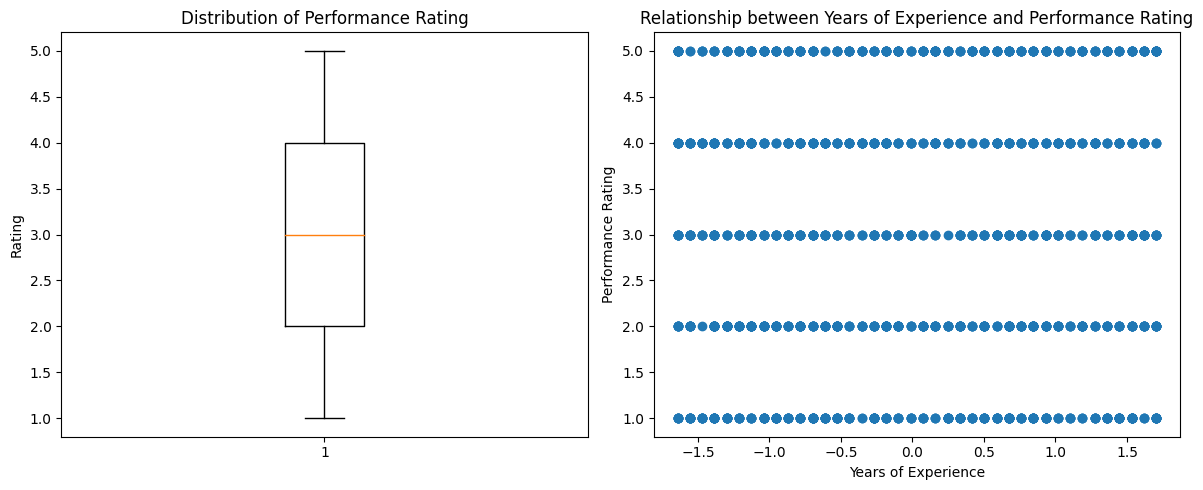

In [ ]:
fig, axes=plt.subplots(1, 2, figsize=(12, 5))

################# Boxplot ###################
axes[0].boxplot(data['Performance Rating'])
axes[0].set_title('Distribution of Performance Rating')
axes[0].set_ylabel('Rating')

############## Scatter plot #################
axes[1].scatter(data['Years of Experience'], data['Performance Rating'])
axes[1].set_title('Relationship between Years of Experience and Performance Rating')
axes[1].set_xlabel('Years of Experience')
axes[1].set_ylabel('Performance Rating')

plt.tight_layout()
plt.show()

In [ ]:
corrMatrix=data[['Age','Years of Experience', 'Performance Rating']].corr()
print(corrMatrix)

                          Age  Years of Experience  Performance Rating
Age                  1.000000             0.024797            0.062584
Years of Experience  0.024797             1.000000            0.009023
Performance Rating   0.062584             0.009023            1.000000


In [ ]:
data['Experience per Age']=data['Years of Experience']/data['Age']

In [ ]:
from sklearn.model_selection import train_test_split

data.drop('EmployeeID', axis=1, inplace=True)
X=data.drop('Performance Rating', axis=1)
y=data['Performance Rating']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)